# Graphing examples

This notebook contains some examples of how to generate isotherm graphs in pyGAPS. In general, we use matplotlib as a backend, and all resulting graphs can be customized as standard matplotlib figures/axes. However, some implicit formatting is applied and some utilities are provided to make it quicker to plot. 

## Import isotherms

First import the example data by running the import notebook

In [1]:
%run import.ipynb
import matplotlib.pyplot as plt

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


## Isotherm display

To generate a quick plot of an isotherm, call the `plot()` function. The parameters to this function are the same as `pygaps.plot_iso`.

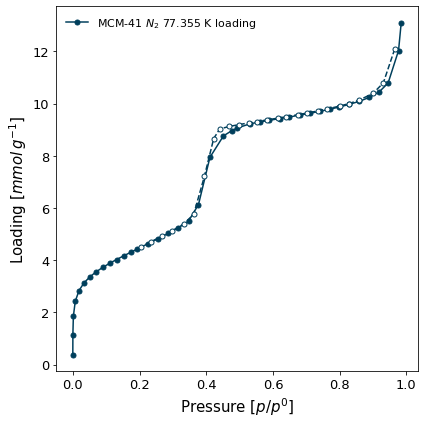

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
ax = isotherm.plot()

## Isotherm plotting and comparison

For more complex plots of multiple isotherms, the `pygaps.plot_iso` function is provided. Several examples of isotherm plotting are presented here:

- A logarithmic isotherm graph comparing the adsorption branch of two isotherms up to 1 bar (`x_range=(None, 1)`).
  The isotherms are measured on the same material and batch, but at different temperatures, 
  so we want this information to be visible in the legend (`lgd_keys=[...]`).
  We also want the loading to be displayed in *cm3 STP* (`loading_unit="cm3(STP)"`) and to select the colours manually (`color=[...]`).

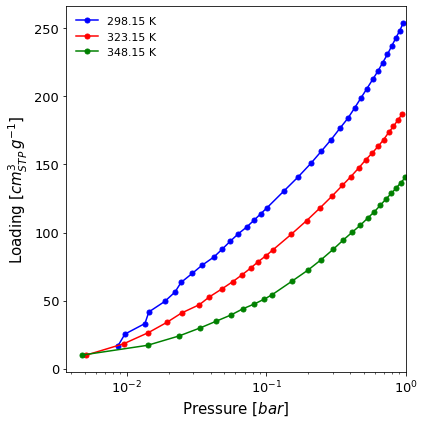

In [3]:
import pygaps.graphing as pgg

ax = pgg.plot_iso(
    isotherms_isosteric,
    branch = 'ads',
    logx = True,
    x_range=(None,1),
    lgd_keys=['temperature'],
    loading_unit='cm3(STP)',
    color=['b', 'r', 'g']
)

- A black and white (`color=False`) full scale graph of both adsorption and desorption branches of an
  isotherm (`branch = 'all'`), saving it to the local directory for a publication (`save_path=path`). The result file is found [here](novel.png). We also display the isotherm points using X markers (`marker=['x']`) and set the figure title (`fig_title='Novel Behaviour'`). 

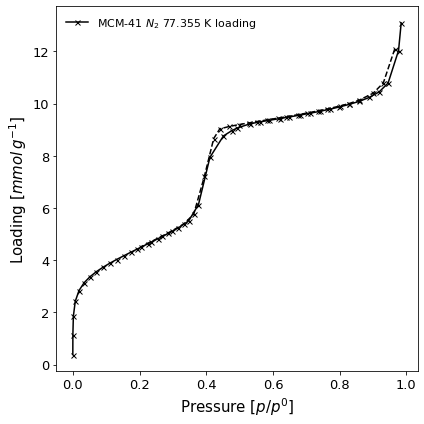

In [4]:
import pygaps.graphing as pgg
from pathlib import Path

path = Path.cwd() / 'novel.png'

isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')

ax = pgg.plot_iso(
    isotherm,
    branch = 'all',
    color=False,
    save_path=path,
    marker=['x'],
)

- A graph which plots the both the loading and enthalpy as a function of pressure on the left
  and the enthalpy as a function of loading on the right, for a microcalorimetry experiment.
  To do this, we separately generate the axes and pass them in to the `plot_iso` function (`ax=ax1`).
  We want the legend to appear inside the graph (`lgd_pos='inner'`) and, to limit the range of enthalpy 
  displayed to 40 kJ (either `y2_range` or `y1_range`, depending on where it is displayed). 
  Finally, we want to manually control the size of the pressure and enthalpy markers (`y1_line_style=dict(markersize=0)`).

<AxesSubplot:xlabel='Loading [$mmol\\/g^{-1}$]', ylabel='$\\Delta_{ads}h$ $(-kJ\\/mol^{-1})$'>

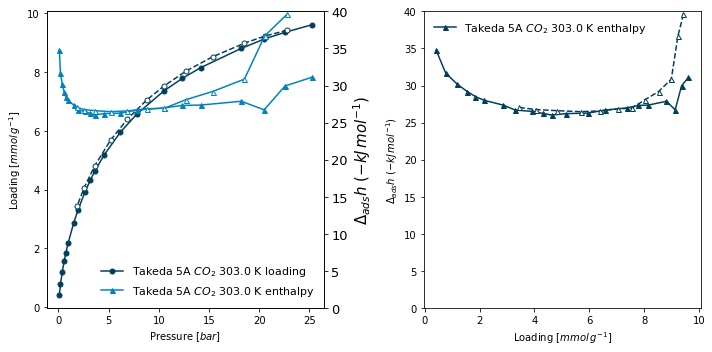

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

pgg.plot_iso(
    isotherms_calorimetry[1],
    ax=ax1,
    x_data='pressure',
    y1_data='loading',
    y2_data='enthalpy',
    lgd_pos='lower right',
    y2_range=(0,40),
    y1_line_style=dict(markersize=0),
    y2_line_style=dict(markersize=3),
)
pgg.plot_iso(
    isotherms_calorimetry[1],
    ax=ax2,
    x_data='loading',
    y1_data='enthalpy',
    y1_range=(0,40),
    lgd_pos='best',
    marker=['^'],
    y1_line_style=dict(linewidth=0)
)

- A comparison graph of all the nitrogen isotherms, with both branches shown but without adding the desorption branch to the label (`branch='all-nol'`). We want each isotherm to use a different marker (`marker=len(isotherms)`) and to not display the desorption branch component of the legend (only `lgd_keys=['material']`).

Text(0.5, 1.0, 'Regular isotherms colour')

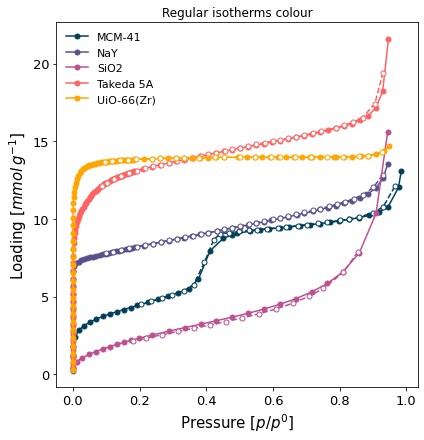

In [6]:
ax = pgg.plot_iso(
    isotherms_n2_77k, 
    branch='all',
    lgd_keys=['material'],
    marker=len(isotherms_n2_77k)
)
ax.set_title("Regular isotherms colour")

- A black and white version of the same graph (`color=False`), but with absolute pressure in bar.

Text(0.5, 1.0, 'Black and white')

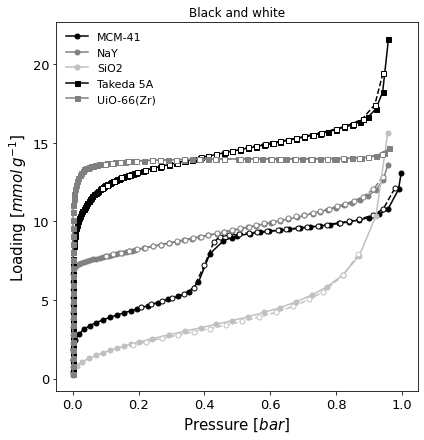

In [7]:
ax = pgg.plot_iso(
    isotherms_n2_77k, 
    branch='all',
    color=False,
    lgd_keys=['material'],
    pressure_mode='absolute',
    pressure_unit='bar',
   )
ax.set_title("Black and white")

- Only some ranges selected for display from all the isotherms (`x_range=(0.2, 0.6)` and `y1_range=(3, 10)`).

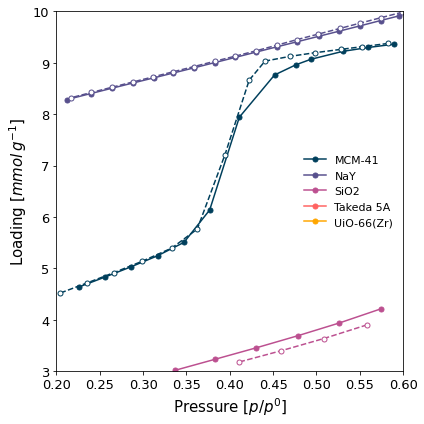

In [8]:
ax = pgg.plot_iso(
    isotherms_n2_77k, 
    branch='all',
    x_range=(0.2, 0.6), 
    y1_range=(3, 10), 
    lgd_keys=['material']
)

- The isosteric pressure isotherms, in relative pressure mode and loading in cm3(STP). No markers 
  are displayed (`marker=False`).

Text(0.5, 1.0, 'Different pressure mode or units')

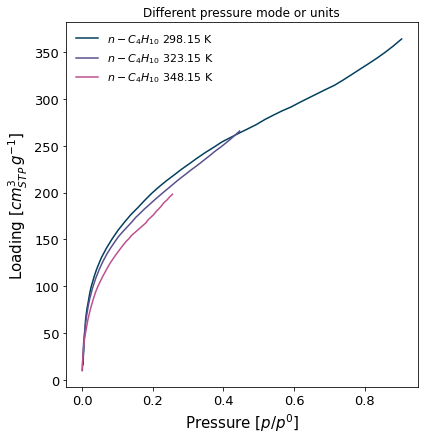

In [9]:
ax = pgg.plot_iso(
    isotherms_isosteric,
    branch='ads',
    pressure_mode='relative',
    loading_unit='cm3(STP)',
    lgd_keys=['adsorbate', 'temperature'],
    marker=False
)
ax.set_title("Different pressure mode or units")

- Only desorption branch of some isotherms (`branch='des'`), displaying the user who recorded the isotherms
  in the graph legend.

Text(0.5, 1.0, 'Only desorption branch')

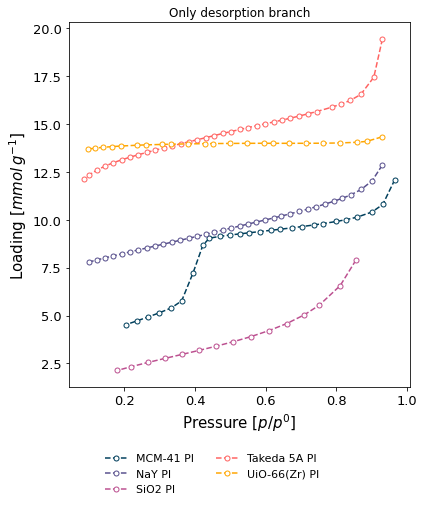

In [10]:
ax = pgg.plot_iso(
    isotherms_n2_77k,
    branch='des',
    lgd_keys=['material', 'user'],
    lgd_pos='out bottom',
)
ax.set_title("Only desorption branch")